In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import json

# Explore COCO Annotations

In [2]:
## To download the coco annotations

# ! wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip
# ! unzip annotations_trainval2014.zip

In [4]:
ins_train = json.load(open('./annotations/instances_train2017.json', 'r'))

In [5]:
## Clean up the files

# ! rm -rf ./annotations/
# ! rm annotations_trainval2014.zip

In [46]:
## checkout the README of this part to find out how the mapping was obtained

# with open('./category_mapping.json', 'r') as f:
#     category_mapping = json.load(f)

In [6]:
## top level keys
ins_train.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

## `categories`

In [7]:
len(ins_train['categories']), ins_train['categories'][0]

(80, {'supercategory': 'person', 'id': 1, 'name': 'person'})

In [8]:
categories = ins_train['categories']
category_mapping = {r['id']:r['name'] for r in categories}

## to store mapping locally
# with open('./coco_category_mapping.json', 'w') as fw:
#     json.dump(category_mapping, fw)

category_mapping

{1: 'person',
 2: 'bicycle',
 3: 'car',
 4: 'motorcycle',
 5: 'airplane',
 6: 'bus',
 7: 'train',
 8: 'truck',
 9: 'boat',
 10: 'traffic light',
 11: 'fire hydrant',
 13: 'stop sign',
 14: 'parking meter',
 15: 'bench',
 16: 'bird',
 17: 'cat',
 18: 'dog',
 19: 'horse',
 20: 'sheep',
 21: 'cow',
 22: 'elephant',
 23: 'bear',
 24: 'zebra',
 25: 'giraffe',
 27: 'backpack',
 28: 'umbrella',
 31: 'handbag',
 32: 'tie',
 33: 'suitcase',
 34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket',
 44: 'bottle',
 46: 'wine glass',
 47: 'cup',
 48: 'fork',
 49: 'knife',
 50: 'spoon',
 51: 'bowl',
 52: 'banana',
 53: 'apple',
 54: 'sandwich',
 55: 'orange',
 56: 'broccoli',
 57: 'carrot',
 58: 'hot dog',
 59: 'pizza',
 60: 'donut',
 61: 'cake',
 62: 'chair',
 63: 'couch',
 64: 'potted plant',
 65: 'bed',
 67: 'dining table',
 70: 'toilet',
 72: 'tv',
 73: 'laptop',
 74: 'mo

## `annotations`

In [12]:
len(ins_train['annotations']), ins_train['annotations'][0]

(860001,
 {'segmentation': [[239.97,
    260.24,
    222.04,
    270.49,
    199.84,
    253.41,
    213.5,
    227.79,
    259.62,
    200.46,
    274.13,
    202.17,
    277.55,
    210.71,
    249.37,
    253.41,
    237.41,
    264.51,
    242.54,
    261.95,
    228.87,
    271.34]],
  'area': 2765.1486500000005,
  'iscrowd': 0,
  'image_id': 558840,
  'bbox': [199.84, 200.46, 77.71, 70.88],
  'category_id': 58,
  'id': 156})

In [10]:
all_image_ids = [x['id'] for x in ins_train['images']]
len(all_image_ids)

118287

In [11]:
bbox_df = pd.DataFrame([x['bbox'] for x in ins_train['annotations']], columns=['x','y','width','height'])
bbox_df.describe()

,x,y,width,height
count,860001.000000,860001.000000,860001.000000,860001.000000
mean,243.461816,193.013263,103.894745,107.418773
std,169.405320,119.673263,127.618042,114.852586
min,0.000000,0.000000,0.230000,0.000000
25%,99.240000,103.330000,23.210000,27.720000
50%,230.820000,186.910000,54.140000,62.340000
75%,370.500000,269.850000,128.500000,144.970000
max,638.340000,635.130000,640.000000,640.000000


In [15]:
all_cats = [x['category_id'] for x in ins_train['annotations']]

counts_label = Counter(all_cats).most_common()
# print(f'class `person` is {round(262465 / 43867)}X bigger than class `car`')

In [16]:
def plot_counts(counts_label, title='COCO category counts'):
    plt.figure(figsize=(17, 4))
    x = [n[0] for n in counts_label]
    x_labels = [category_mapping[n[0]] for n in counts_label]
    y = [n[1] for n in counts_label]

    plt.bar(x, y, color='green', align='center', width=0.9)
    plt.title(title)
    plt.xticks(x, x_labels, rotation='vertical')
    plt.show()

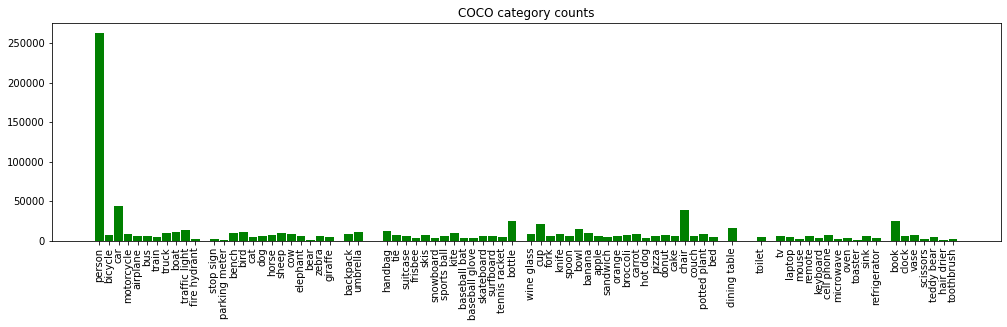

In [17]:
plot_counts(counts_label)

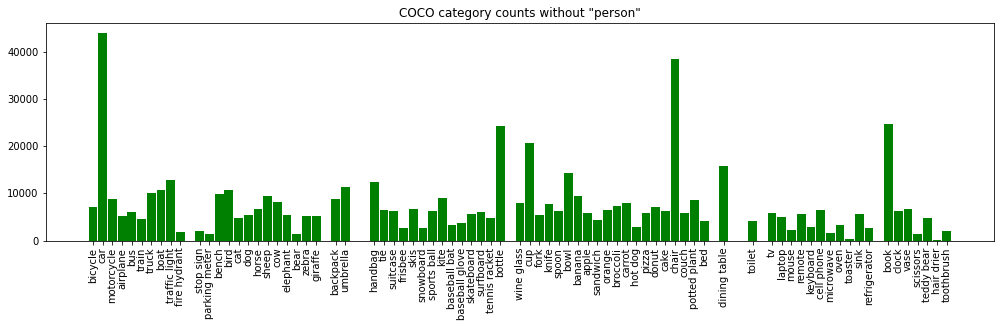

In [18]:
plot_counts(counts_label[1:], title='COCO category counts without "person"')

## `images`

In [20]:
ins_train['images'][0]

{'license': 3,
 'file_name': '000000391895.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
 'height': 360,
 'width': 640,
 'date_captured': '2013-11-14 11:18:45',
 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
 'id': 391895}

In [1]:
def parse_line(text, keys_to_extract=['bbox', 'width', 'height', 'id']):
    """
    turns a non quote json content to dict
    eg:
        'id: 0, height: 330, width: 1093, bbox:[69, 464, 312, 175],'
        to
        {'bbox': [69, 464, 312, 175], 'width': 1093, 'height': 330, 'id': 0}
    Arguments:
        text: str, the content to be extracted
        keys_to_extract: list, the expected keys in the content, ⚠️ in reverse order!
    Returns:
        parsed_content: dict
    """
    parsed_content = {}
    start = None
    for key_name in keys_to_extract:
        stop, start = start, text.index(key_name)
        content = text[start:stop].strip(', ')
        k, v = [x.strip(' ') for x in content.split(':')]
        parsed_content[k] = eval(v)
    return parsed_content

In [2]:
with open('./sample_coco.txt', 'r') as f:
    coco_data = [parse_line(x.strip()) for x in f.readlines()]